In [1]:
import numpy as np

from Load_image import *
a= 64
b= 64
folder_path = "./datasets/recognition/train"
X_train,y_train,X_val,y_val = load_images_from_folder_sep(folder_path,test_size=0.2)
folder_path = "./datasets/recognition/test"
X_test,y_test = load_images_from_folder(folder_path)

list = []
num_class, list = count_class("./datasets/recognition/test")
#Numeric the labels set
def numeric(y):
    label_to_index = {label: i for i, label in enumerate(list)}
    y_numeric = np.array([label_to_index[label] for label in y])
    return y_numeric

y_train_numeric = numeric(y_train)
y_val_numeric = numeric(y_val)
y_test_numeric = numeric(y_test)

print(f"Number of loaded training images: {len(X_train)}") 
print(f"Number of loaded validation images: {len(X_val)}") 
print(f"Number of loaded test images: {len(X_test)}") 
print(f"- Classes sets include : {list}")
#print(X_train[0][0][0][0])#pixel value at specific point
#x,y,z=np.array(X_train[0]).shape #size of specific picture
#print(x,y,z)

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)


Training:  000_hatsune_miku 44
Validating:  000_hatsune_miku 11
Training:  001_kinomoto_sakura 105
Validating:  001_kinomoto_sakura 27
Training:  002_suzumiya_haruhi 65
Validating:  002_suzumiya_haruhi 17
Training:  003_fate_testarossa 51
Validating:  003_fate_testarossa 13
Training:  004_takamachi_nanoha 69
Validating:  004_takamachi_nanoha 18
Training:  005_lelouch_lamperouge 48
Validating:  005_lelouch_lamperouge 13
Training:  006_akiyama_mio 47
Validating:  006_akiyama_mio 12
Training:  008_shana 60
Validating:  008_shana 16
Training:  009_hakurei_reimu 65
Validating:  009_hakurei_reimu 17
Training:  010_izumi_konata 72
Validating:  010_izumi_konata 19
Testing:  000_hatsune_miku 12
Testing:  001_kinomoto_sakura 28
Testing:  002_suzumiya_haruhi 20
Testing:  003_fate_testarossa 16
Testing:  004_takamachi_nanoha 21
Testing:  005_lelouch_lamperouge 14
Testing:  006_akiyama_mio 15
Testing:  008_shana 18
Testing:  009_hakurei_reimu 19
Testing:  010_izumi_konata 22
Number of loaded traini

(626, 64, 64, 3)
Training data shape:  (626, 12288)
(163, 64, 64, 3)
Training data shape:  (163, 12288)
(185, 64, 64, 3)
Training data shape:  (185, 12288)
[169.89297125 174.96325879 186.09105431 167.39616613 172.77795527
 183.81948882 167.24440895 172.75079872 184.80191693 167.46805112]


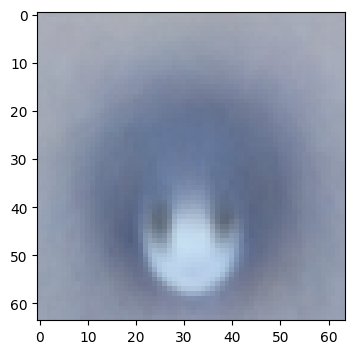

(626, 12289)
(163, 12289)
(185, 12289)


In [2]:
from PreProcess import *
#PreProcessing
X_train= PreProc(X_train,a,b)
X_val= PreProc(X_val,a,b)
X_test= PreProc(X_test,a,b)
####Calc mean#
mean =CalcMean(X_train,a,b)
#Minus for mean
X_train= Minus_mean(X_train,mean)
X_val= Minus_mean(X_val,mean)
X_test= Minus_mean(X_test,mean)

#Bias trick
X_train = Bias_trick(X_train)
X_val = Bias_trick(X_val)
X_test = Bias_trick(X_test)

In [3]:
# In the file linear_classifier.py, implement SGD in the function
# LinearClassifier.train() and then run it with the code below.
from linear_classifier_t import *
import time

svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=5e-7, reg=5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print ('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 3.356681
iteration 100 / 1500: loss 0.461592
iteration 200 / 1500: loss 1.407042
iteration 300 / 1500: loss 0.294651
iteration 400 / 1500: loss 0.245720
iteration 500 / 1500: loss 0.700795
iteration 600 / 1500: loss 1.246565
iteration 700 / 1500: loss 0.149641
iteration 800 / 1500: loss 0.344584
iteration 900 / 1500: loss 0.352568
iteration 1000 / 1500: loss 0.983125
iteration 1100 / 1500: loss 0.344968
iteration 1200 / 1500: loss 0.198768
iteration 1300 / 1500: loss 0.101690
iteration 1400 / 1500: loss 0.438393
That took 21.843745s


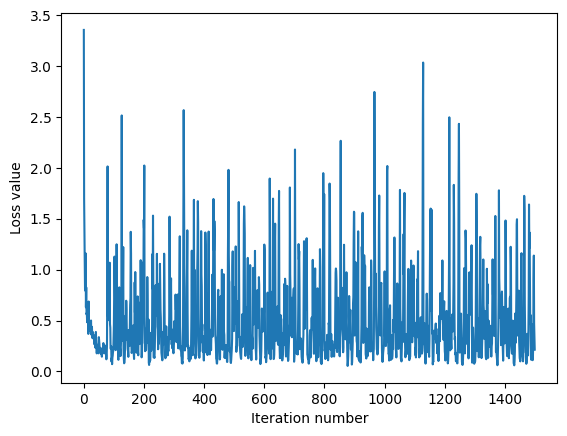

In [4]:
# A useful debugging strategy is to plot the loss as a function of
# iteration number
import matplotlib.pyplot as plt
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [5]:
# Write the LinearSVM.predict function and evaluate the performance on both the
# training and validation set
y_train_pred = svm.predict(X_train)
print ('training accuracy: %f' % (np.mean(y_train_numeric == y_train_pred), ))
y_val_pred = svm.predict(X_val)
print(y_val_numeric.shape)
print(y_val_pred.shape)
print ('validation accuracy: %f' % (np.mean(y_val_numeric == y_val_pred), ))

training accuracy: 0.942492
(163,)
(163,)
validation accuracy: 0.644172


In [6]:
from linear_classifier_t import *
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of about 0.4 on the validation set.
learning_rates = [1e-7, 2e-7, 3e-7, 8e-7]
regularization_strengths = [1e4, 2e4, 3e4, 4e4, 5e4, 6e4, 7e4, 8e4, 1e5]

# results is dictionary mapping tuples of the form
# (learning_rate, regularization_strength) to tuples of the form
# (training_accuracy, validation_accuracy). The accuracy is simply the fraction
# of data points that are correctly classified.
results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
best_svm = None # The LinearSVM object that achieved the highest validation rate.
  
for lr in learning_rates:
    for r in regularization_strengths:
        svm = LinearSVM()
        loss_hist = svm.train(X_train, y_train, learning_rate=lr, reg=r,
                      num_iters=2500, verbose=False)
        y_train_pred = svm.predict(X_train)
        #print(y_train_pred.shape)
        y_val_pred = svm.predict(X_val)
        acc_train = np.mean(y_train_numeric == y_train_pred)
        #print(acc_train)
        acc_val = np.mean(y_val_numeric == y_val_pred)
        results[(lr, r)] = (acc_train, acc_val)
        print (lr, r, acc_train, acc_val)
        if acc_val > best_val:
            best_val = acc_val
            best_svm = svm
# print 'validation accuracy: %f' % (np.mean(y_val == y_val_pred), )

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print ('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print ('best validation accuracy achieved during cross-validation: %f' % best_val)

1e-07 10000.0 1.0 0.6625766871165644
1e-07 20000.0 1.0 0.7239263803680982
1e-07 30000.0 1.0 0.7300613496932515
1e-07 40000.0 0.9952076677316294 0.7177914110429447
1e-07 50000.0 1.0 0.7177914110429447
1e-07 60000.0 1.0 0.7300613496932515
1e-07 70000.0 0.9968051118210862 0.7116564417177914
1e-07 80000.0 0.9968051118210862 0.7116564417177914
1e-07 100000.0 0.9936102236421726 0.7239263803680982
2e-07 10000.0 1.0 0.7423312883435583
2e-07 20000.0 1.0 0.7239263803680982
2e-07 30000.0 0.9984025559105432 0.7116564417177914
2e-07 40000.0 0.9936102236421726 0.7177914110429447
2e-07 50000.0 0.987220447284345 0.6932515337423313
2e-07 60000.0 0.9728434504792333 0.7239263803680982
2e-07 70000.0 0.9648562300319489 0.6687116564417178
2e-07 80000.0 0.8849840255591054 0.6012269938650306
2e-07 100000.0 0.9408945686900958 0.656441717791411
3e-07 10000.0 0.9984025559105432 0.7055214723926381
3e-07 20000.0 0.9968051118210862 0.7300613496932515
3e-07 30000.0 0.9568690095846646 0.6441717791411042
3e-07 40000.0

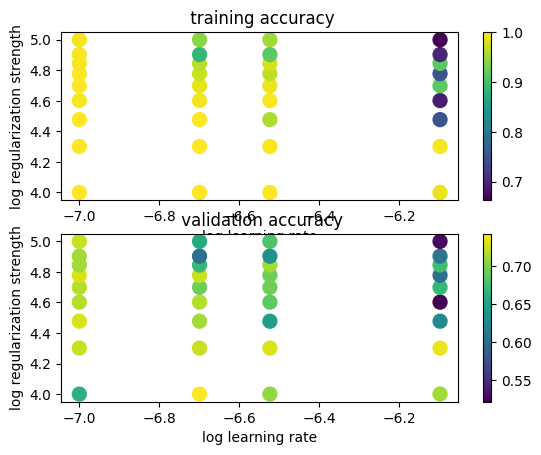

In [28]:
# Visualize the cross-validation results
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title(' training accuracy')

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title(' validation accuracy')
plt.show()

In [29]:
# Evaluate the best svm on test set
print(X_test.shape)
y_test_pred = best_svm.predict(X_test)
test_accuracy = np.mean(y_test_numeric == y_test_pred)
print ('linear SVM on raw pixels final test set accuracy: %f' % test_accuracy)

y_test_numeric = np.array(y_test_numeric)
y_test_pred = np.array(y_test_pred)


(185, 12289)
linear SVM on raw pixels final test set accuracy: 0.724324


In [ ]:
################################################################################################################

In [20]:
from sklearn.metrics import accuracy_score
print('accuracy = ',accuracy_score(y_test_numeric, y_test_pred))

accuracy =  0.7243243243243244


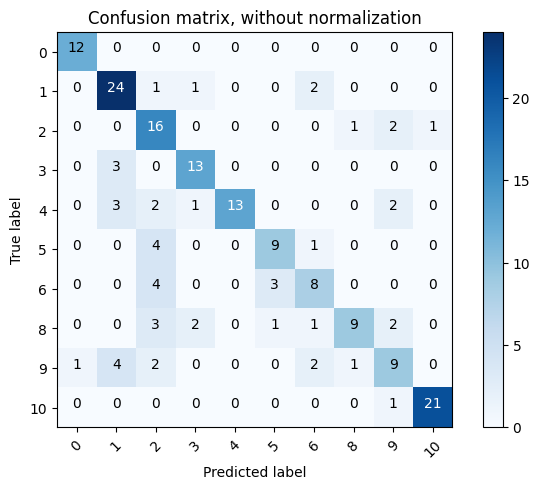

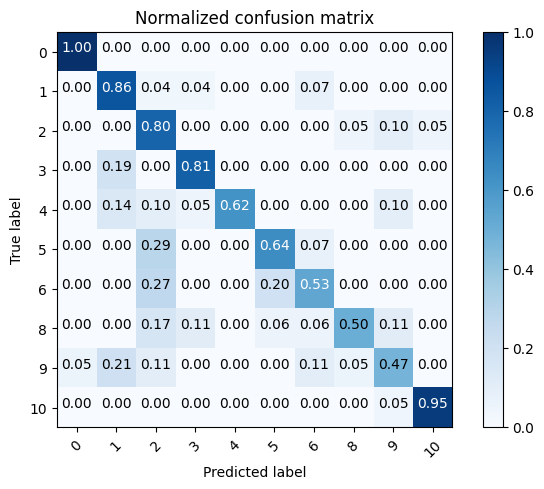

In [31]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test_numeric, y_test_pred)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
class_names = [0, 1, 2, 3, 4, 5, 6, 8, 9, 10]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
################################################################################################################

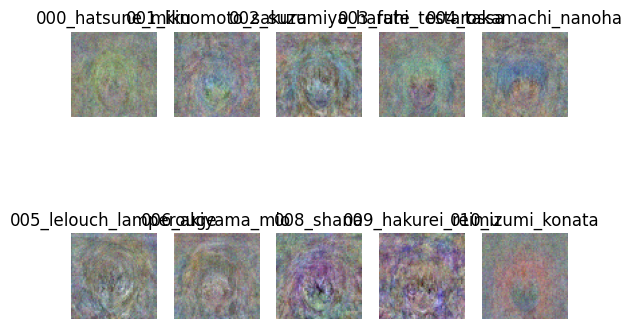

In [9]:
# Visualize the learned weights for each class.
# Depending on your choice of learning rate and regularization strength, these may
# or may not be nice to look at.
w = best_svm.W[:-1,:] # strip out the bias
w = w.reshape(a, b, 3, 10)
w_min, w_max = np.min(w), np.max(w)

for i in range(10):
  plt.subplot(2, 5, i + 1)
    
  # Rescale the weights to be between 0 and 255
  wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
  plt.imshow(wimg.astype('uint8'))
  plt.axis('off')
  plt.title(list[i])

In [10]:
print(w.shape)
print(w)

(64, 64, 3, 10)
[[[[ 4.41122976e-06 -2.35564914e-05 -1.64730324e-05 ...  1.40387245e-06
    -1.97296552e-06  1.56446030e-06]
   [ 3.49499222e-06 -1.27730223e-05  9.62924552e-08 ...  5.80914953e-06
    -5.10945910e-07  4.26898827e-06]
   [-8.98059554e-06 -8.30451549e-06  9.50474369e-06 ...  3.01193721e-06
    -1.71431442e-07  1.44181678e-05]]

  [[-5.68330583e-07 -2.23529136e-05 -5.36559970e-06 ... -1.22416732e-05
     1.42381784e-06  1.23622334e-05]
   [-1.91778218e-06 -8.62572039e-06  4.99613022e-06 ... -5.09073005e-06
     6.14604484e-06  1.04710142e-05]
   [-5.58885263e-06 -1.63372923e-05 -7.91650125e-06 ...  5.41307224e-06
    -2.70152074e-06 -8.12089135e-06]]

  [[-2.00087675e-06 -2.29439459e-05 -1.28579691e-05 ... -3.40679857e-06
     2.21412860e-06 -7.47034028e-06]
   [-9.70503987e-06 -7.71049684e-06  1.54229093e-06 ...  7.32172576e-06
    -9.32657165e-07 -4.31814884e-07]
   [-3.27209633e-06 -1.52455634e-05 -1.45977772e-06 ...  6.13230888e-06
     8.31471837e-06  6.91825514e-06]

In [11]:
##############################################################################################################

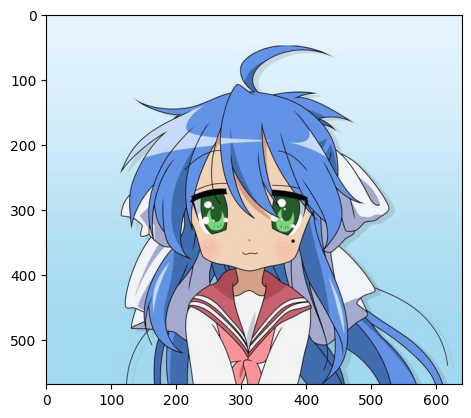

In [32]:
img = cv2.imread("./datasets/sample2.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [33]:
import matplotlib.pyplot as plt

resize_size = (a, b)

img = cv2.resize(img, resize_size)
img = img.astype('float64')  # visualize the mean image
X = np.array(img)
print(X.shape)
X = X.flatten()
print('Training data shape: ', X.shape)

import matplotlib.pyplot as plt
# first: compute the image mean based on the training data
mean_image = np.mean(X)
print(mean_image)  # print a few of the elements


#Minus for mean
X -= mean
#Bias trick
img_1 = np.append(X, 1)
print(X.shape)  # , X_dev.shape

y_test_pred = best_svm.predict(img_1)
test_accuracy = np.mean(y_test_numeric == y_test_pred)
print ('linear SVM on raw pixels final test set accuracy: %f' % test_accuracy)
print("it is : ",list[y_test_pred])

(64, 64, 3)
Training data shape:  (12288,)
198.15470377604166
(12288,)
linear SVM on raw pixels final test set accuracy: 0.118919
it is :  010_izumi_konata
